# **Procesamiento del Lenguaje Natural (PLN)**

**Análisis de Sentimientos**: es una técnica de procesamiento del lenguaje natural (PLN) que utiliza inteligencia artificial para determinar si un texto expresa un sentimiento positivo, negativo o neutro.

- Recolección de texto: desde el JSON.
- Limpieza y normalización: minúsculas, acentos, caracteres extraños.
- Tokenización: tokenizar().
- Análisis de sentimiento: Palabras positivas/negativas - neutras.
- Enriquecimiento del dataset: se agrega sentiment_score y sentimiento.

**Librerias**
- **Transformers** es una arquitectura de redes neuronales diseñada para procesar secuencias de texto de manera eficiente usando mecanismos de atención. Permite entender el contexto completo de una frase sin procesarla paso a paso. Es la base de modelos de lenguaje modernos como BERT, GPT y RoBERTa, ampliamente usada en PLN para tareas como análisis de sentimiento, clasificación y traducción.

- **PySentimiento** es una librería en Python especializada en análisis de sentimiento y emociones en español y otros idiomas. Utiliza modelos transformers ya preentrenados (como BETO) para clasificar textos como positivos, negativos o neutros, e incluso detectar emociones, sin necesidad de entrenar un modelo desde cero.

In [1]:
#Instalación de las Librerías
%pip install transformers torch --upgrade
%pip install pysentimiento

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5

In [2]:
# Gestión de librerías
import json
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

### **Act 01** - Cargar el dataset

In [3]:
# Gestión del dataset de sentimientos
url = 'https://raw.githubusercontent.com/aperezn298/CienciaDatosSENA/refs/heads/main/04Datasets/dataset_nlp_comercial_500.json'
dataset = pd.read_json(url)

dataset.head()

,id,negocio,categoria,comentario_cliente,fecha,canal
0,1,Café Aroma,Electrónica,"Buena experiencia en general, pero pueden mejo...",2024-04-24,whatsapp
1,2,PetWorld,Ropa,"No quedé satisfecho con la calidad, esperaba a...",2024-10-29,web
2,3,UrbanWear,Electrónica,"El producto llegó rápido y en buen estado, aun...",2024-04-21,web
3,4,FitLife,Hogar,El proceso de devolución fue sencillo y rápido.,2024-10-14,web
4,5,GreenBeauty,Hogar,El chat en línea nunca está disponible cuando ...,2024-08-17,whatsapp


In [4]:
# Información del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  500 non-null    int64 
 1   negocio             500 non-null    object
 2   categoria           500 non-null    object
 3   comentario_cliente  500 non-null    object
 4   fecha               500 non-null    object
 5   canal               500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


### **Act 02** - Cargar modelo preentrenado

* **Modelo de sentimientos:** "pysentimiento/robertuito-sentiment-analysis" Es un modelo preentrenado en español para análisis de sentimiento, publicado por PySentimiento, basado en la arquitectura RoBERTa.
  * *Organización / autor:* pysentimiento
  * *Modelo:* robertuito-sentiment-analysis

* *AutoModelForSequenceClassification.from_pretrained()* Permite crear un modelo ya entrenado, listo para clasificar texto, usando la arquitectura correspondiente, cargándola automáticamente desde HuggingFace.

**Tokenizar:** Proceso de convertir el texto humano en números que el modelo pueda entender.

*  *AutoTokenizer.from_pretrained()* carga el tokenizador exacto que necesita el modelo.

In [5]:
# Cargar modelo preentrenado
MODEL_NAME = "pysentimiento/robertuito-sentiment-analysis"
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

#### **Modelos de Análisis de Sentimientos**

| Modelo                                      | Tarea                  | Etiquetas principales          | Descripción breve                              |
|---------------------------------------------|------------------------|--------------------------------|------------------------------------------------|
| pysentimiento/robertuito-sentiment-analysis | Sentimiento            | POS, NEG, NEU                  | Clasifica sentimiento en español.              |
| pysentimiento/robertuito-emotion-analysis   | Emociones              | alegría, enojo, tristeza, etc. | Detecta emociones en texto.                    |
| pysentimiento/robertuito-hate-speech        | Hate Speech            | HS, NOT-HS                     | Detecta discurso de odio.                      |
| pysentimiento/robertuito-irony              | Ironía                 | IRONY, NOT-IRONY               | Detecta ironía o sarcasmo.                     |
| pysentimiento/robertuito-offensive          | Ofensivo               | OFFENSIVE, NOT-OFFENSIVE       | Identifica lenguaje ofensivo.                  |


Un **pipeline** es una herramienta que une todos los pasos necesarios para resolver una tarea de Procesamiento de Lenguaje Natural en una sola función fácil de usar.
  - Recibe el texto
  - Lo tokeniza (lo convierte a números)
  - Lo envía al modelo
  - Interpreta los resultados
  - Devuelve la respuesta final

In [6]:
# Crear el pipeline para análisis de sentimiento usando el modelo y tokenizador cargados
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cpu


In [7]:
# Este modelo devuelve etiquetas: "POS", "NEG", "NEU"
label_map = {
    "POS": "positivo",
    "NEG": "negativo",
    "NEU": "neutral"
}

### **Act 03** - Aplicar el análisis de sentimientos

In [8]:
# Extraer los comentarios del dataset
comentarios = dataset["comentario_cliente"].fillna("").astype(str).tolist()

In [9]:
# Realizar la predicción sobre la lista de comentarios
results = classifier(
    comentarios,
    batch_size=16,
    truncation=True
)

In [10]:
# Resultado de la inferencia - 5 primeros
results[:5]

[{'label': 'POS', 'score': 0.6169692873954773},
 {'label': 'NEU', 'score': 0.4819389879703522},
 {'label': 'POS', 'score': 0.5172536969184875},
 {'label': 'POS', 'score': 0.6586042642593384},
 {'label': 'NEG', 'score': 0.9410302639007568}]

In [11]:
# Extraer etiquetas y scores
labels = [result["label"] for result in results]
scores = [result["score"] for result in results]

In [12]:
# Agregar etiquetas, scores y sentimiento al dataset
dataset["label"] = labels
dataset["score"] = scores
dataset["sentimiento"] = dataset["label"].map(label_map)

dataset.head()

,id,negocio,categoria,comentario_cliente,fecha,canal,label,score,sentimiento
0,1,Café Aroma,Electrónica,"Buena experiencia en general, pero pueden mejo...",2024-04-24,whatsapp,POS,0.616969,positivo
1,2,PetWorld,Ropa,"No quedé satisfecho con la calidad, esperaba a...",2024-10-29,web,NEU,0.481939,neutral
2,3,UrbanWear,Electrónica,"El producto llegó rápido y en buen estado, aun...",2024-04-21,web,POS,0.517254,positivo
3,4,FitLife,Hogar,El proceso de devolución fue sencillo y rápido.,2024-10-14,web,POS,0.658604,positivo
4,5,GreenBeauty,Hogar,El chat en línea nunca está disponible cuando ...,2024-08-17,whatsapp,NEG,0.941030,negativo


<Axes: title={'center': 'Distribución de Sentimientos'}>

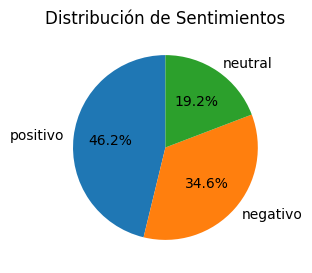

In [13]:
# Grafica de los sentimientos encontrados
sentimientos_df = dataset["sentimiento"].value_counts()
sentimientos_df.plot(kind="pie", title="Distribución de Sentimientos",
                     autopct="%1.1f%%", startangle=90, figsize=(4, 3), ylabel='')

### **Opcional**
Capa de **REGLAS** sobre el sentimiento del modelo: (negaciones, frases del dominio, expresiones locales)

In [14]:
# Patrones claramente negativos (comercio/servicio)
PATRONES_NEGATIVOS_FUERTES = [
    "no quede satisfecho", "no quedé satisfecho", "no estoy satisfecho",
    "no estoy satisfecha", "no me gusto", "no me gustó", "no me agrado",
    "no me agradó", "mala calidad", "muy mala calidad", "pesimo servicio",
    "pésimo servicio", "pessimo servicio", "nunca vuelvo a comprar",
    "no vuelvo a comprar", "no lo recomiendo", "no la recomiendo",
    "me estafaron", "una porqueria", "una porquería", "una mierda",
    "re maluco", "re malo", "demasiado caro", "carisimo", "carísimo",
    "no respondieron", "no responden", "no contestaron", "no contestan",
    "no solucionaron nada", "no dieron solucion","no dieron solución",
    "muy demorado", "demoraron demasiado", "llego danado", "llego dañado",
    "llegó dañado", "llego incompleto", "pedido incompleto",
]

In [15]:
# Patrones claramente positivos (expresiones comunes y locales)
PATRONES_POSITIVOS_FUERTES = [
    "super recomendado", "súper recomendado", "super bueno", "súper bueno",
    "super bien", "súper bien", "excelente servicio", "excelente atencion",
    "excelente atención", "muy buena atencion", "muy buena atención",
    "muy buena experiencia", "todo perfecto", "me encanto", "me encantó",
    "me fascino", "me fascinó", "una chimba de servicio", "una chimba",
    "todo bien la verdad", "quede muy satisfecho", "quedé muy satisfecho",
    "quede muy satisfecha", "quedé muy satisfecha", "volveria a comprar",
    "volvería a comprar", "lo recomiendo mucho", "la recomiendo mucho"
]

In [16]:
# Patrones donde la negación suaviza (ej: "no es tan malo")
PATRONES_NEGACION_SUAVIZA = [
    "no es tan malo", "no es tan mala", "no esta mal", "no está mal",
    "no estuvo tan mal", "podria ser peor pero", "podría ser peor pero",
    "no fue tan malo", "no fue tan mala"
]

**Acento de las palabras**, corresponde al proceso de eliminar las tildes y los signos diacríticos de un texto español, para dejar solo las letras básicas del alfabeto.

In [17]:
# Gestión de librerías
import unicodedata

In [18]:
# Funcion para quitar los acentos de las palabras
def quitar_acentos(texto: str) -> str:
    # Verificar que el texto sea una cadena
    if not isinstance(texto, str):
        return ""
    # Normalizar el texto para separar los caracteres acentuados - NFD (Normalization Form Decomposition)
    texto = unicodedata.normalize("NFD", texto)
    # Eliminar los caracteres acentuados
    texto = texto.encode("ascii", "ignore").decode("utf-8")
    return texto

In [19]:
# Capa de reglas sobre el resultado del modelo:
#    - Si detecta patrones fuertemente negativos -> 'negativo'
#    - Si detecta patrones fuertemente positivos -> 'positivo' (si el modelo no dijo 'negativo')
#    - Si detecta negaciones que suavizan -> pasa de 'negativo' a 'neutral'

def aplicar_reglas_sentimiento(comentario: str, sentimiento_modelo: str) -> str:
    comentario_sin_acentos = quitar_acentos(comentario.lower())

    # Reglas para patrones negativos fuertes
    for patron in PATRONES_NEGATIVOS_FUERTES:
        if patron in comentario_sin_acentos:
            return "negativo"

    # Reglas para patrones positivos fuertes
    for patron in PATRONES_POSITIVOS_FUERTES:
        if patron in comentario_sin_acentos:
            if sentimiento_modelo != "negativo":
                return "positivo"

    # Reglas para negaciones que suavizan
    for patron in PATRONES_NEGACION_SUAVIZA:
        if patron in comentario_sin_acentos:
            if sentimiento_modelo == "negativo":
                return "neutral"

    return sentimiento_modelo

Una función *lambda* en Python es muy similar a una función flecha en JavaScript. Son funciones rápidas y de una sola línea. La diferencia es que en Python solo puedes escribir una expresión, mientras que en JavaScript puedes escribir varias líneas si lo necesitas.

**Sintaxis:**

    lambda argumentos: expresión


In [22]:
# Aplicar las reglas al dataset
dataset["sentimiento_final"] = dataset.apply(
    lambda row: aplicar_reglas_sentimiento(row["comentario_cliente"], row["sentimiento"]), axis=1
)

In [23]:
# Dataset con las reglas de negocio aplicadas
dataset.head()

,id,negocio,categoria,comentario_cliente,fecha,canal,label,score,sentimiento,sentimiento_final
0,1,Café Aroma,Electrónica,"Buena experiencia en general, pero pueden mejo...",2024-04-24,whatsapp,POS,0.616969,positivo,positivo
1,2,PetWorld,Ropa,"No quedé satisfecho con la calidad, esperaba a...",2024-10-29,web,NEU,0.481939,neutral,negativo
2,3,UrbanWear,Electrónica,"El producto llegó rápido y en buen estado, aun...",2024-04-21,web,POS,0.517254,positivo,positivo
3,4,FitLife,Hogar,El proceso de devolución fue sencillo y rápido.,2024-10-14,web,POS,0.658604,positivo,positivo
4,5,GreenBeauty,Hogar,El chat en línea nunca está disponible cuando ...,2024-08-17,whatsapp,NEG,0.941030,negativo,negativo


<Axes: title={'center': 'Distribución de Sentimientos Ajustado'}>

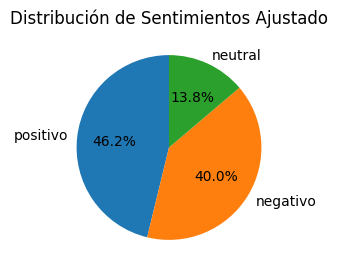

In [25]:
# Grafica de los sentimientos ajustado - REGLAS NEGOCIO
sentimientos_df_pro = dataset["sentimiento_final"].value_counts()
sentimientos_df_pro.plot(kind="pie", title="Distribución de Sentimientos Ajustado",
                     autopct="%1.1f%%", startangle=90, figsize=(4, 3), ylabel='')

## **Nube de palabras**

In [26]:
#Instalación de las Librerías
%pip install wordcloud matplotlib

In [28]:
# Gestión de librerías
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**re.sub** sirve para buscar un patrón en un texto usando expresiones regulares y reemplazarlo por otro.

    re.sub(patrón, reemplazo, texto, count=0, flags=0)

In [29]:
# Limpiar la nube de palabras
# - minúsculas - quitar acentos - quitar URLs, números y signos

def limpiar_para_nube(texto: str) -> str:
    # Verificar que el texto sea una cadena
    if not isinstance(texto, str):
        return ""
    # Convertir a minúsculas
    texto = texto.lower()
    # Quitar acentos
    texto = quitar_acentos(texto)
    # Quitar URLs
    texto = re.sub(r"http\S+|www\S+", " ", texto)
    # Quitar números y signos
    texto = re.sub(r"[^a-zñ\s]", " ", texto)
    # Eliminar espacios extras
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

In [30]:
# Conectores en español
STOPWORDS_ES = {
    "el", "la", "los", "las", "de", "del", "y", "o", "u", "en", "por",
    "para", "con", "sin", "que", "es", "son", "un", "una", "unos", "unas",
    "muy", "mas", "más", "menos", "al", "lo", "se", "me", "mi", "mis",
    "tu", "tus", "su", "sus", "ya", "no", "si", "sí", "como", "pero",
    "a", "este", "esta", "esto", "estos", "estas"
}

In [32]:
# Funcion para generar la nube de palabras por sentimiento
def generar_nube_por_sentimiento(df, sentimiento):
    # Filtrar el DataFrame por el sentimiento dado
    subset = df[df["sentimiento_final"] == sentimiento]
    # Validar si el subset está vacío
    if subset.empty:
        print(f"No hay comentarios con sentimiento '{sentimiento}', no se genera nube.")
        return

    # Unir todos los comentarios en un solo texto
    texto = " ".join(subset["comentario_cliente"].fillna("").astype(str).tolist())
    # Limpiar el texto para la nube de palabras
    texto_limpio = limpiar_para_nube(texto)

    # Validar si el texto limpio está vacío
    if not texto_limpio:
        print(f"Texto vacío después de limpieza para '{sentimiento}'.")
        return

    # Generar la nube de palabras
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color="white",
        stopwords=STOPWORDS_ES,
        collocations=False
    ).generate(texto_limpio)

    # Mostrar la nube de palabras - imagen
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de palabras - Sentimiento: {sentimiento}\n", fontsize=16)
    plt.tight_layout()
    plt.show()

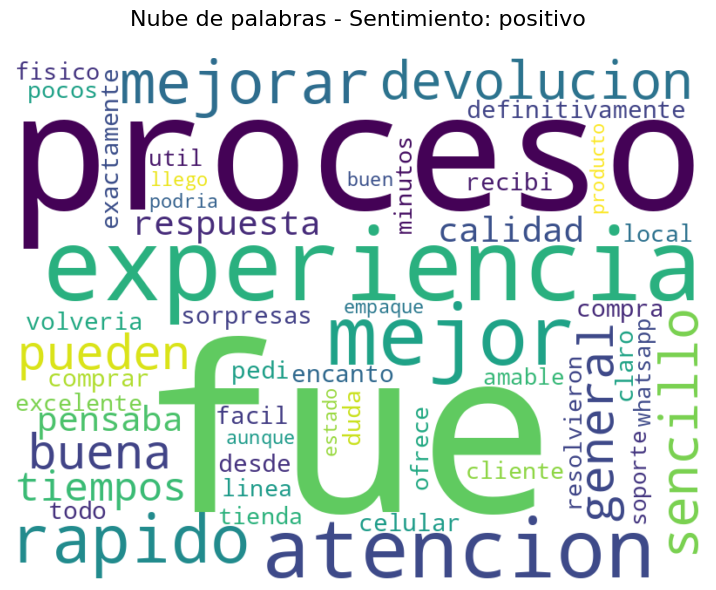

In [33]:
# Nubes de palabras - Sentimiento positivo
generar_nube_por_sentimiento(dataset, "positivo")

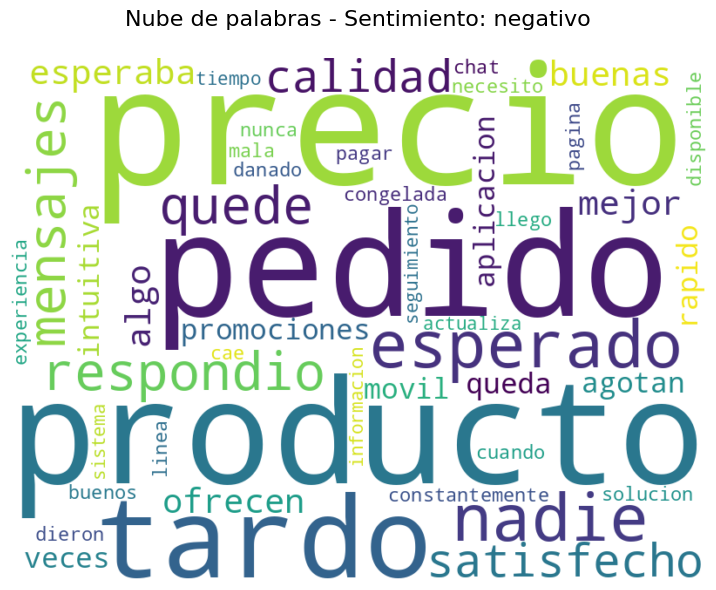

In [34]:
# Nubes de palabras - Sentimiento negativo
generar_nube_por_sentimiento(dataset, "negativo")

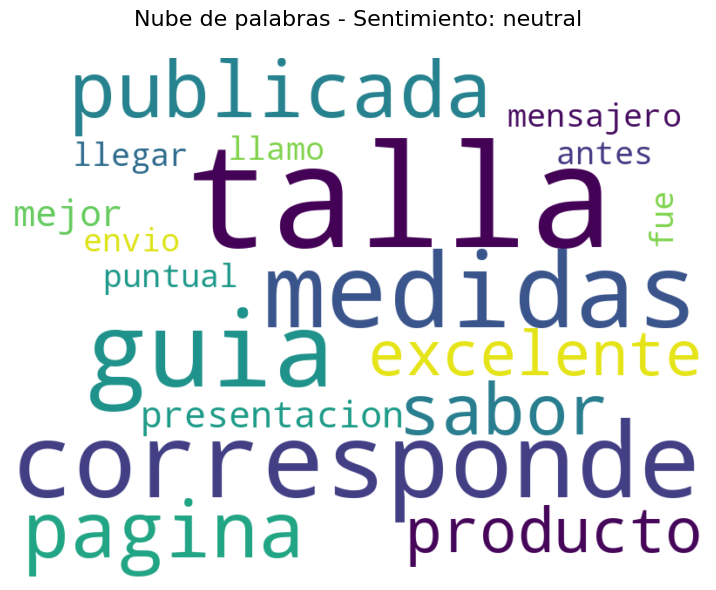

In [35]:
# Nubes de palabras - Sentimiento neutral
generar_nube_por_sentimiento(dataset, "neutral")